In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error, explained_variance_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Cálculo de Stock e Impacto económico**

Cargamos los ficheros de RMSE de modelos ML y Naives

In [3]:
file_path = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/best_rmse_by_product_final.csv"
RMSE_ML = pd.read_csv(file_path)

In [4]:
RMSE_ML

,producto,RMSE,modelo
0,1,15.659334,XGB
1,1,14.895816,RF
2,1,15.594800,LGB
3,1,20.540469,DT
4,1,15.479945,LSTM
...,...,...,...
4835,1000,2.985207,LSTM
4836,1000,2.974409,RF
4837,1000,2.979105,LGB
4838,1000,2.986006,XGB


In [5]:
file_path = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/rmse_by_product_nb_final.csv"
RMSE_Naives = pd.read_csv(file_path)

In [6]:
RMSE_Naives

,producto,RMSE
0,1,34.217790
1,2,28.819255
2,3,23.303068
3,4,14.388258
4,5,13.575592
...,...,...
963,996,4.260733
964,997,3.877237
965,998,4.160251
966,999,6.268708


En primer lugar, vamos a quedarnos con el RMSE más bajo para cada producto (mejor modelo para cada producto)

In [7]:
# Encuentra el índice del menor RMSE por producto
indices_min_rmse = RMSE_ML.groupby('producto')['RMSE'].idxmin()

# Selecciona las filas correspondientes
best_rmse_by_ml = RMSE_ML.loc[indices_min_rmse]

# Muestra el DataFrame resultante
best_rmse_by_ml

,producto,RMSE,modelo
1,1,14.895816,RF
9,2,9.958897,LGB
10,3,8.772048,LGB
19,4,9.368164,LGB
23,5,8.199181,LSTM
...,...,...,...
4819,996,2.729071,LGB
4820,997,3.097152,LGB
4827,998,3.190243,DT
4834,999,4.453674,RF


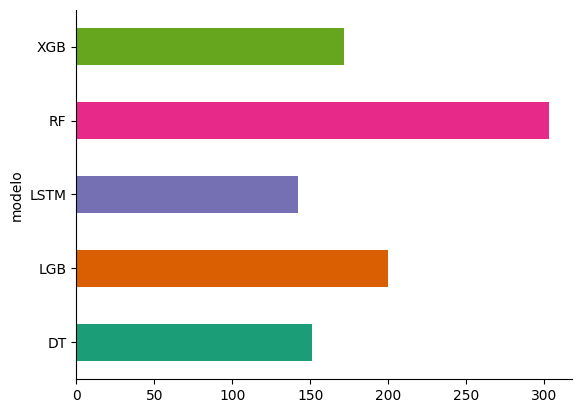

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
best_rmse_by_ml.groupby('modelo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Ahora vamos a importar el fichero del ciclo de aprovisionamiento

In [9]:
file_path = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/DatosCicloAprovisionamiento.xlsx"
DatosCicloAprovisionamiento = pd.read_excel(file_path)

In [10]:
DatosCicloAprovisionamiento['raiz_ciclo_aprovisionamiento'] = np.sqrt(DatosCicloAprovisionamiento['diasEntrePedidos'] + DatosCicloAprovisionamiento['diasLeadtime'])

In [11]:
DatosCicloAprovisionamiento

,producto,diasEntrePedidos,diasLeadtime,raiz_ciclo_aprovisionamiento
0,1,14,15,5.385165
1,2,14,15,5.385165
2,3,14,15,5.385165
3,4,14,15,5.385165
4,5,14,15,5.385165
...,...,...,...,...
995,996,14,2,4.000000
996,997,14,2,4.000000
997,998,16,4,4.472136
998,999,7,2,3.000000


Ahora calculamos las udsStock

In [12]:
factor_servicio = 1.64
DatosCicloAprovisionamiento = DatosCicloAprovisionamiento.merge(best_rmse_by_ml, on='producto')
DatosCicloAprovisionamiento['udsStock'] = factor_servicio * DatosCicloAprovisionamiento['RMSE'] * DatosCicloAprovisionamiento['raiz_ciclo_aprovisionamiento']


In [13]:
DatosCicloAprovisionamiento

,producto,diasEntrePedidos,diasLeadtime,raiz_ciclo_aprovisionamiento,RMSE,modelo,udsStock
0,1,14,15,5.385165,14.895816,RF,131.554933
1,2,14,15,5.385165,9.958897,LGB,87.953698
2,3,14,15,5.385165,8.772048,LGB,77.471837
3,4,14,15,5.385165,9.368164,LGB,82.736538
4,5,14,15,5.385165,8.199181,LSTM,72.412465
...,...,...,...,...,...,...,...
963,996,14,2,4.000000,2.729071,LGB,17.902707
964,997,14,2,4.000000,3.097152,LGB,20.317320
965,998,16,4,4.472136,3.190243,DT,23.398207
966,999,7,2,3.000000,4.453674,RF,21.912078


Importamos el fichero con los datos de precios

In [14]:
file_path = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/DatosPrecioMedio.xlsx"
DatosPrecioMedio = pd.read_excel(file_path)

In [15]:
DatosPrecioMedio

,producto,eurPrecioMedio
0,1,68.730000
1,2,148.330000
2,3,169.000000
3,4,0.604383
4,5,4.553314
...,...,...
995,996,17.120000
996,997,17.710000
997,998,8.270000
998,999,8.270000


Calculamos el coste diario

In [16]:
DatosPrecioMedio = DatosPrecioMedio.merge(DatosCicloAprovisionamiento, on='producto')

In [17]:
factor = 0.05
DatosPrecioMedio['CosteStock'] = factor * DatosPrecioMedio['udsStock'] * DatosPrecioMedio['eurPrecioMedio']


In [18]:
DatosPrecioMedio

,producto,eurPrecioMedio,diasEntrePedidos,diasLeadtime,raiz_ciclo_aprovisionamiento,RMSE,modelo,udsStock,CosteStock
0,1,68.730000,14,15,5.385165,14.895816,RF,131.554933,452.088527
1,2,148.330000,14,15,5.385165,9.958897,LGB,87.953698,652.308602
2,3,169.000000,14,15,5.385165,8.772048,LGB,77.471837,654.637019
3,4,0.604383,14,15,5.385165,9.368164,LGB,82.736538,2.500228
4,5,4.553314,14,15,5.385165,8.199181,LSTM,72.412465,16.485836
...,...,...,...,...,...,...,...,...,...
963,996,17.120000,14,2,4.000000,2.729071,LGB,17.902707,15.324717
964,997,17.710000,14,2,4.000000,3.097152,LGB,20.317320,17.990987
965,998,8.270000,16,4,4.472136,3.190243,DT,23.398207,9.675159
966,999,8.270000,7,2,3.000000,4.453674,RF,21.912078,9.060644


In [19]:
DatosPrecioMedio['CosteStock_365'] = 365 * DatosPrecioMedio['CosteStock']

In [20]:
DatosPrecioMedio

,producto,eurPrecioMedio,diasEntrePedidos,diasLeadtime,raiz_ciclo_aprovisionamiento,RMSE,modelo,udsStock,CosteStock,CosteStock_365
0,1,68.730000,14,15,5.385165,14.895816,RF,131.554933,452.088527,165012.312526
1,2,148.330000,14,15,5.385165,9.958897,LGB,87.953698,652.308602,238092.639731
2,3,169.000000,14,15,5.385165,8.772048,LGB,77.471837,654.637019,238942.511781
3,4,0.604383,14,15,5.385165,9.368164,LGB,82.736538,2.500228,912.583086
4,5,4.553314,14,15,5.385165,8.199181,LSTM,72.412465,16.485836,6017.329970
...,...,...,...,...,...,...,...,...,...,...
963,996,17.120000,14,2,4.000000,2.729071,LGB,17.902707,15.324717,5593.521827
964,997,17.710000,14,2,4.000000,3.097152,LGB,20.317320,17.990987,6566.710261
965,998,8.270000,16,4,4.472136,3.190243,DT,23.398207,9.675159,3531.432939
966,999,8.270000,7,2,3.000000,4.453674,RF,21.912078,9.060644,3307.135203


In [21]:
sumatorio_CosteStock_365 = DatosPrecioMedio['CosteStock_365'].sum()

In [22]:
sumatorio_CosteStock_365

18691332.76752851

In [23]:
DatosPrecioMedio_M1 = DatosPrecioMedio

Ahora hacemos lo mismo para Naives

In [24]:
file_path = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/DatosCicloAprovisionamiento.xlsx"
DatosCicloAprovisionamiento = pd.read_excel(file_path)

In [25]:
DatosCicloAprovisionamiento['raiz_ciclo_aprovisionamiento'] = np.sqrt(DatosCicloAprovisionamiento['diasEntrePedidos'] + DatosCicloAprovisionamiento['diasLeadtime'])

In [26]:
factor_servicio = 1.64
DatosCicloAprovisionamiento = DatosCicloAprovisionamiento.merge(RMSE_Naives, on='producto')
DatosCicloAprovisionamiento['udsStock'] = factor_servicio * DatosCicloAprovisionamiento['RMSE'] * DatosCicloAprovisionamiento['raiz_ciclo_aprovisionamiento']


In [27]:
file_path = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/DatosPrecioMedio.xlsx"
DatosPrecioMedio = pd.read_excel(file_path)

In [28]:
DatosPrecioMedio = DatosPrecioMedio.merge(DatosCicloAprovisionamiento, on='producto')

In [29]:
factor = 0.05
DatosPrecioMedio['CosteStock'] = factor * DatosPrecioMedio['udsStock'] * DatosPrecioMedio['eurPrecioMedio']


In [30]:
DatosPrecioMedio['CosteStock_365'] = 365 * DatosPrecioMedio['CosteStock']

In [31]:
DatosPrecioMedio

,producto,eurPrecioMedio,diasEntrePedidos,diasLeadtime,raiz_ciclo_aprovisionamiento,RMSE,udsStock,CosteStock,CosteStock_365
0,1,68.730000,14,15,5.385165,34.217790,302.200238,1038.511117,379056.557871
1,2,148.330000,14,15,5.385165,28.819255,254.522157,1887.663575,688997.205002
2,3,169.000000,14,15,5.385165,23.303068,205.805011,1739.052343,634754.105350
3,4,0.604383,14,15,5.385165,14.388258,127.072354,3.840018,1401.606635
4,5,4.553314,14,15,5.385165,13.575592,119.895154,27.296016,9963.045805
...,...,...,...,...,...,...,...,...,...
963,996,17.120000,14,2,4.000000,4.260733,27.950409,23.925550,8732.825735
964,997,17.710000,14,2,4.000000,3.877237,25.434675,22.522405,8220.677706
965,998,8.270000,16,4,4.472136,4.160251,30.512545,12.616937,4605.182092
966,999,8.270000,7,2,3.000000,6.268708,30.842045,12.753185,4654.912695


In [32]:
sumatorio_CosteStock_365 = DatosPrecioMedio['CosteStock_365'].sum()

In [33]:
sumatorio_CosteStock_365

45412002.62008464

In [36]:
DatosPrecioMedio_M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   producto                      968 non-null    int64  
 1   eurPrecioMedio                968 non-null    float64
 2   diasEntrePedidos              968 non-null    int64  
 3   diasLeadtime                  968 non-null    int64  
 4   raiz_ciclo_aprovisionamiento  968 non-null    float64
 5   RMSE                          968 non-null    float64
 6   modelo                        968 non-null    object 
 7   udsStock                      968 non-null    float64
 8   CosteStock                    968 non-null    float64
 9   CosteStock_365                968 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 75.8+ KB


In [38]:
DatosPrecioMedio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   producto                      968 non-null    int64  
 1   eurPrecioMedio                968 non-null    float64
 2   diasEntrePedidos              968 non-null    int64  
 3   diasLeadtime                  968 non-null    int64  
 4   raiz_ciclo_aprovisionamiento  968 non-null    float64
 5   RMSE                          968 non-null    float64
 6   udsStock                      968 non-null    float64
 7   CosteStock                    968 non-null    float64
 8   CosteStock_365                968 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 68.2 KB


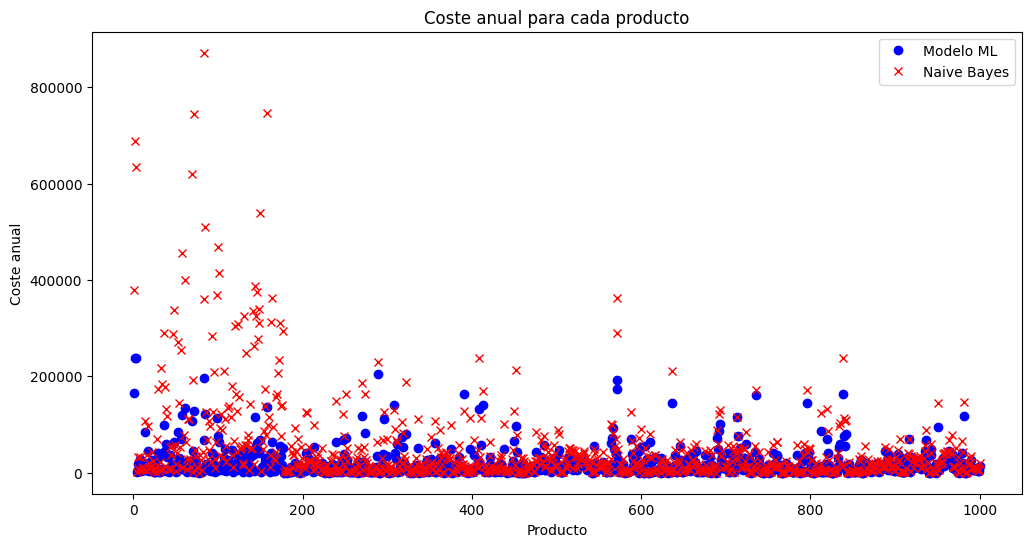

In [40]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos del primer DataFrame
ax.plot(DatosPrecioMedio_M1['producto'], DatosPrecioMedio_M1['CosteStock_365'], label='Modelo ML', color='blue', marker='o', linestyle='')

# Graficar los datos del segundo DataFrame
ax.plot(DatosPrecioMedio['producto'], DatosPrecioMedio['CosteStock_365'], label='Naive Bayes', color='red', marker='x', linestyle='')

# Añadir título y etiquetas a los ejes
ax.set_title('Coste anual para cada producto')
ax.set_xlabel('Producto')
ax.set_ylabel('Coste anual')

# Añadir una leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

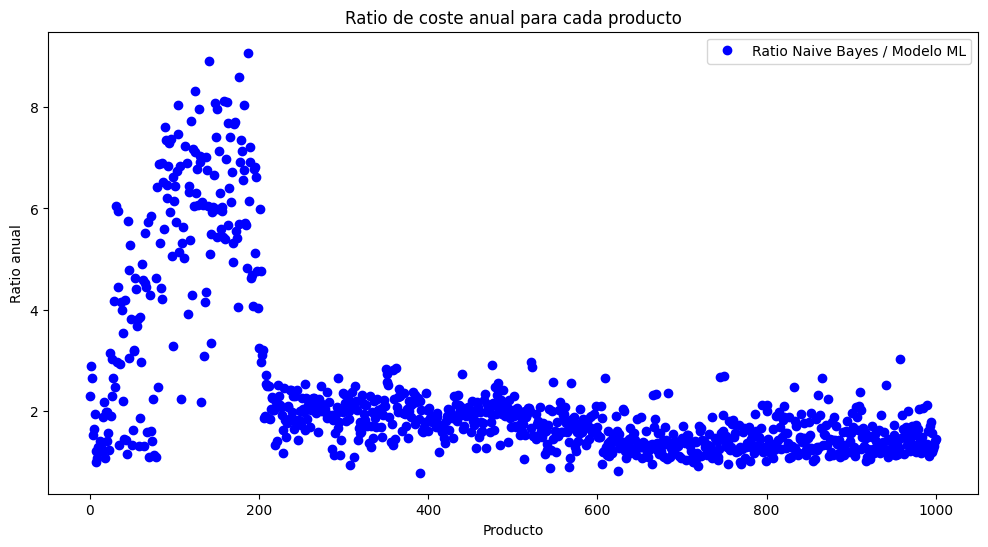

In [46]:
ratio = DatosPrecioMedio['CosteStock_365'] / DatosPrecioMedio_M1['CosteStock_365']

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos
ax.plot(DatosPrecioMedio_M1['producto'], ratio, label='Ratio Naive Bayes / Modelo ML', color='blue', marker='o', linestyle='')

# Añadir título y etiquetas a los ejes
ax.set_title('Ratio de coste anual para cada producto')
ax.set_xlabel('Producto')
ax.set_ylabel('Ratio anual')

# Añadir una leyenda
ax.legend()

# Mostrar la gráfica
plt.show()